In [3]:
import pandas as pd
import os
current_dir = os.getcwd()
data_path = current_dir+'\\cat-in-the-dat\\'
train_data = pd.read_csv(data_path+'train.csv', index_col = 'id')
test_data = pd.read_csv(data_path+'test.csv',  index_col = 'id')
submission_data = pd.read_csv(data_path+'sample_submission.csv', index_col = 'id')

In [5]:
train_data.shape,test_data.shape

((300000, 24), (200000, 23))

In [6]:
train_data.head()

,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,nom_4,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,T,Y,Green,Triangle,Snake,Finland,Bassoon,...,2f4cb3d51,2,Grandmaster,Cold,h,D,kr,2,2,0
1,0,1,0,T,Y,Green,Trapezoid,Hamster,Russia,Piano,...,f83c56c21,1,Grandmaster,Hot,a,A,bF,7,8,0
2,0,0,0,F,Y,Blue,Trapezoid,Lion,Russia,Theremin,...,ae6800dd0,1,Expert,Lava Hot,h,R,Jc,7,2,0
3,0,1,0,F,Y,Red,Trapezoid,Snake,Canada,Oboe,...,8270f0d71,1,Grandmaster,Boiling Hot,i,D,kW,2,1,1
4,0,0,0,F,N,Red,Trapezoid,Lion,Canada,Oboe,...,b164b72a7,1,Grandmaster,Freezing,a,R,qP,7,8,0


In [9]:
# A function to summarize the features
def resumetable(df):
    print(f'shape of the dataset: {df.shape}')
    summary = pd.DataFrame(df.dtypes, columns=['data Types'])
    summary = summary.reset_index()
    summary = summary.rename(columns={'index': 'feature'})
    summary['num of Nulls']= df.isnull().sum().values
    summary['num of Unique vals']= df.nunique().values
    summary['First Value']= df.loc[0].values
    summary['Second Value']= df.loc[1].values
    summary['Third Value']= df.loc[2].values
    
    return summary

resumetable(train_data)

shape of the dataset: (300000, 24)


,feature,data Types,num of Nulls,num of Unique vals,First Value,Second Value,Third Value
0,bin_0,int64,0,2,0,0,0
1,bin_1,int64,0,2,0,1,0
2,bin_2,int64,0,2,0,0,0
3,bin_3,object,0,2,T,T,F
4,bin_4,object,0,2,Y,Y,Y
5,nom_0,object,0,3,Green,Green,Blue
6,nom_1,object,0,6,Triangle,Trapezoid,Trapezoid
7,nom_2,object,0,6,Snake,Hamster,Lion
8,nom_3,object,0,6,Finland,Russia,Russia
9,nom_4,object,0,4,Bassoon,Piano,Theremin


In [11]:
for i in range(6):
    feature ='ord_'+str(i)
    print(f'{feature} unique values: {train_data[feature].unique()}')

ord_0 unique values: [2 1 3]
ord_1 unique values: ['Grandmaster' 'Expert' 'Novice' 'Contributor' 'Master']
ord_2 unique values: ['Cold' 'Hot' 'Lava Hot' 'Boiling Hot' 'Freezing' 'Warm']
ord_3 unique values: ['h' 'a' 'i' 'j' 'g' 'e' 'd' 'b' 'k' 'f' 'l' 'n' 'o' 'c' 'm']
ord_4 unique values: ['D' 'A' 'R' 'E' 'P' 'K' 'V' 'Q' 'Z' 'L' 'F' 'T' 'U' 'S' 'Y' 'B' 'H' 'J'
 'N' 'G' 'W' 'I' 'O' 'C' 'X' 'M']
ord_5 unique values: ['kr' 'bF' 'Jc' 'kW' 'qP' 'PZ' 'wy' 'Ed' 'qo' 'CZ' 'qX' 'su' 'dP' 'aP'
 'MV' 'oC' 'RL' 'fh' 'gJ' 'Hj' 'TR' 'CL' 'Sc' 'eQ' 'kC' 'qK' 'dh' 'gM'
 'Jf' 'fO' 'Eg' 'KZ' 'Vx' 'Fo' 'sV' 'eb' 'YC' 'RG' 'Ye' 'qA' 'lL' 'Qh'
 'Bd' 'be' 'hT' 'lF' 'nX' 'kK' 'av' 'uS' 'Jt' 'PA' 'Er' 'Qb' 'od' 'ut'
 'Dx' 'Xi' 'on' 'Dc' 'sD' 'rZ' 'Uu' 'sn' 'yc' 'Gb' 'Kq' 'dQ' 'hp' 'kL'
 'je' 'CU' 'Fd' 'PQ' 'Bn' 'ex' 'hh' 'ac' 'rp' 'dE' 'oG' 'oK' 'cp' 'mm'
 'vK' 'ek' 'dO' 'XI' 'CM' 'Vf' 'aO' 'qv' 'jp' 'Zq' 'Qo' 'DN' 'TZ' 'ke'
 'cG' 'tP' 'ud' 'tv' 'aM' 'xy' 'lx' 'To' 'uy' 'ZS' 'vy' 'ZR' 'AP' 'GJ'
 'Wv' 'ri' 'qw

In [12]:
# Data visualization

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Target Distribution')

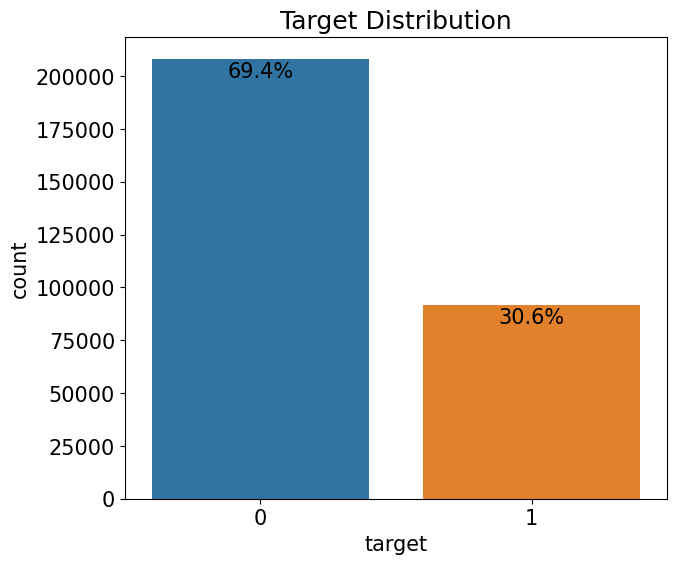

In [20]:
def write_percent(ax, total_size):
    for patch in ax.patches:
        height = patch.get_height()
        width = patch.get_width()
        left_coord = patch.get_x()
        percent = height/total_size*100
        
        ax.text(x=left_coord+ width/2.0,
               y= height - total_size*0.03,
               s=f'{percent:1.1f}%',
               ha = 'center')
        
plt.figure(figsize=(7,6))

mpl.rc('font', size=15)
ax = sns.countplot(x='target', data= train_data)
write_percent(ax, len(train_data))
ax.set_title('Target Distribution')

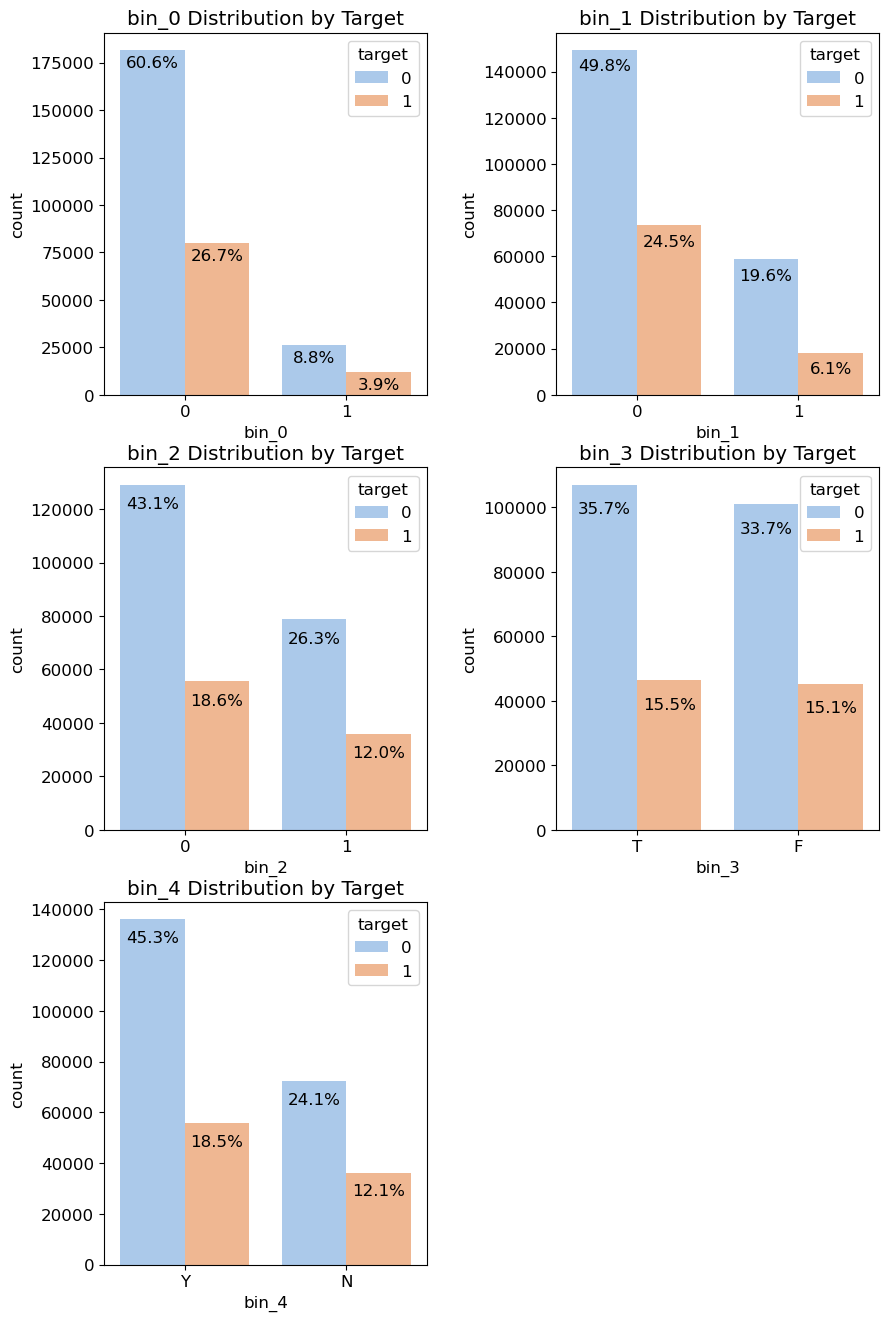

In [22]:
import matplotlib.gridspec as gridspec
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3, 2) 
plt.figure(figsize=(10, 16)) 
plt.subplots_adjust(wspace=0.4, hspace=0.2) 
bin_features = ['bin_0', 'bin_1', 'bin_2', 'bin_3', 'bin_4'] 
for idx, feature in enumerate(bin_features): 
    ax = plt.subplot(grid[idx]) 
    sns.countplot(x=feature,
    data=train_data,
    hue='target',
    palette='pastel', ax=ax)
    ax.set_title(f'{feature} Distribution by Target') 
    write_percent(ax, len(train_data)) 

In [23]:
def get_crosstab(df, feature):
    crosstab = pd.crosstab(df[feature], df['target'], normalize='index')*100
    crosstab = crosstab.reset_index()
    return crosstab

In [30]:
def plot_pointplot(ax, feature, crosstab):
    ax2 = ax.twinx() 
    ax2 = sns.pointplot(x=feature, y=1, data=crosstab, 
                        order=crosstab[feature].values,
                        color='black') 
    ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1) 
    ax2.set_ylabel('Target 1 Ratio(%)')

In [32]:
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15, 20)):
    plt.figure(figsize=size) 
    grid = gridspec.GridSpec(num_rows, num_cols)
    plt.subplots_adjust(wspace=0.45, hspace=0.3)

    for idx, feature in enumerate(features): 
        ax = plt.subplot(grid[idx])
        crosstab = get_crosstab(df, feature) 
        sns.countplot(x=feature, data=df,
                      order=crosstab[feature].values,
                      color='skyblue', ax=ax)
        write_percent(ax, len(df))
        plot_pointplot(ax, feature, crosstab) 
        ax.set_title(f'{feature} Distribution')

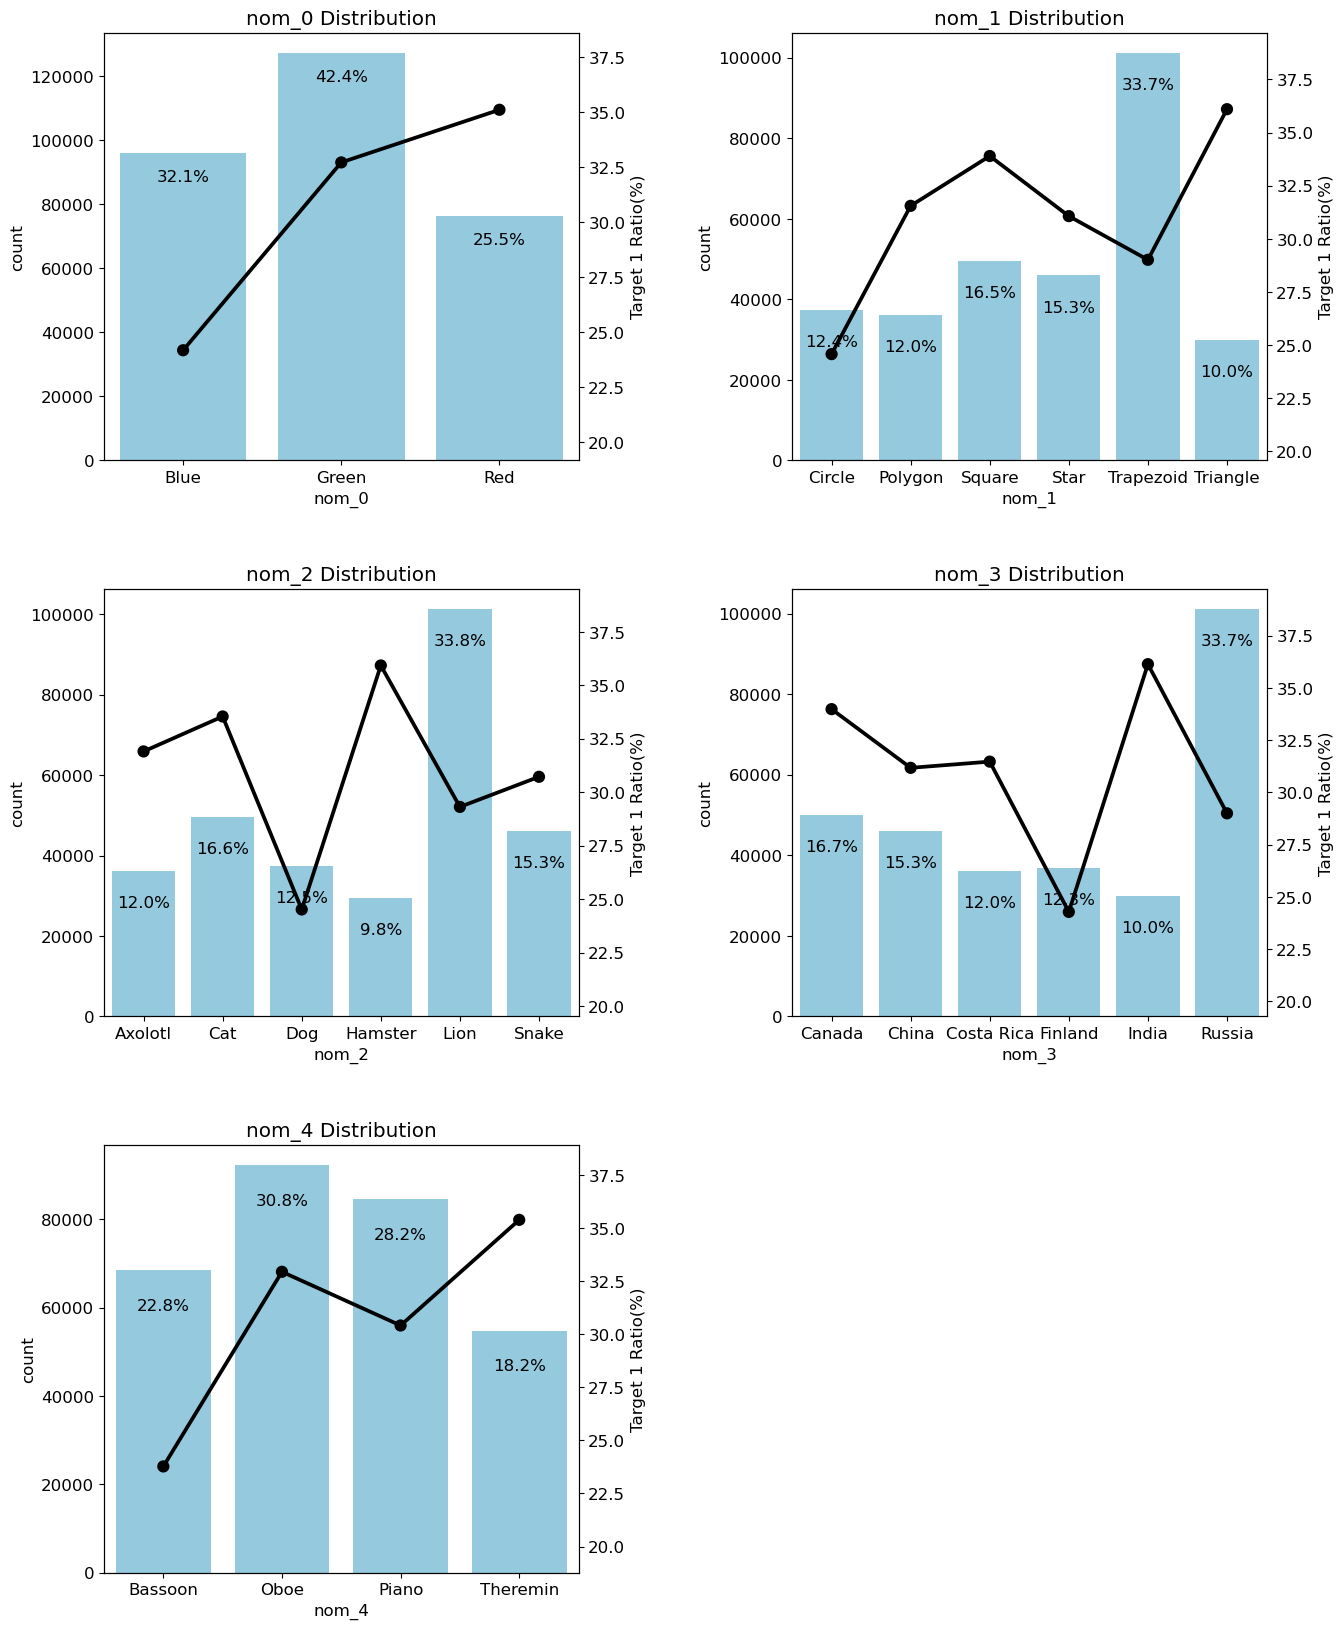

In [33]:
nom_features = ['nom_0', 'nom_1', 'nom_2', 'nom_3', 'nom_4'] 
plot_cat_dist_with_true_ratio(train_data, nom_features, num_rows=3, num_cols=2)

C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
C:\Users\bluea\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
 

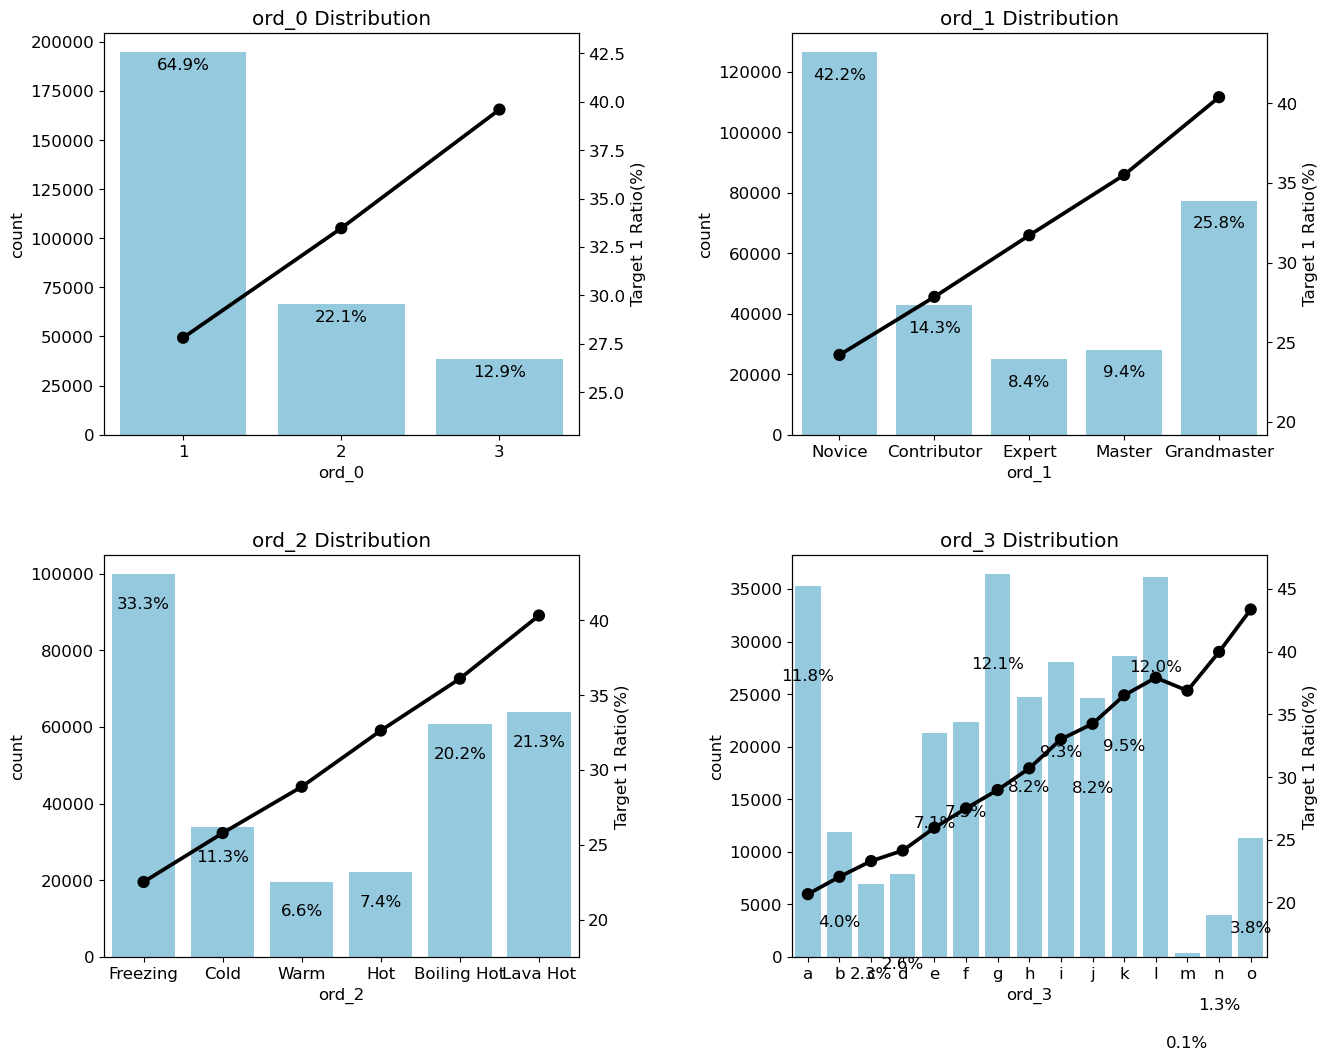

In [37]:
from pandas.api.types import CategoricalDtype
ord_1_value = ['Novice', 'Contributor', 'Expert', 'Master', 'Grandmaster']
ord_2_value = ['Freezing', 'Cold', 'Warm', 'Hot', 'Boiling Hot', 'Lava Hot']

ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)
ord_2_dtype = CategoricalDtype(categories=ord_2_value, ordered=True)

train_data['ord_1'] = train_data['ord_1'].astype(ord_1_dtype)
train_data['ord_2'] = train_data['ord_2'].astype(ord_2_dtype)


ord_features = ['ord_0', 'ord_1', 'ord_2', 'ord_3'] 
plot_cat_dist_with_true_ratio(train_data, ord_features, num_rows=2, num_cols=2, size=(15, 12))

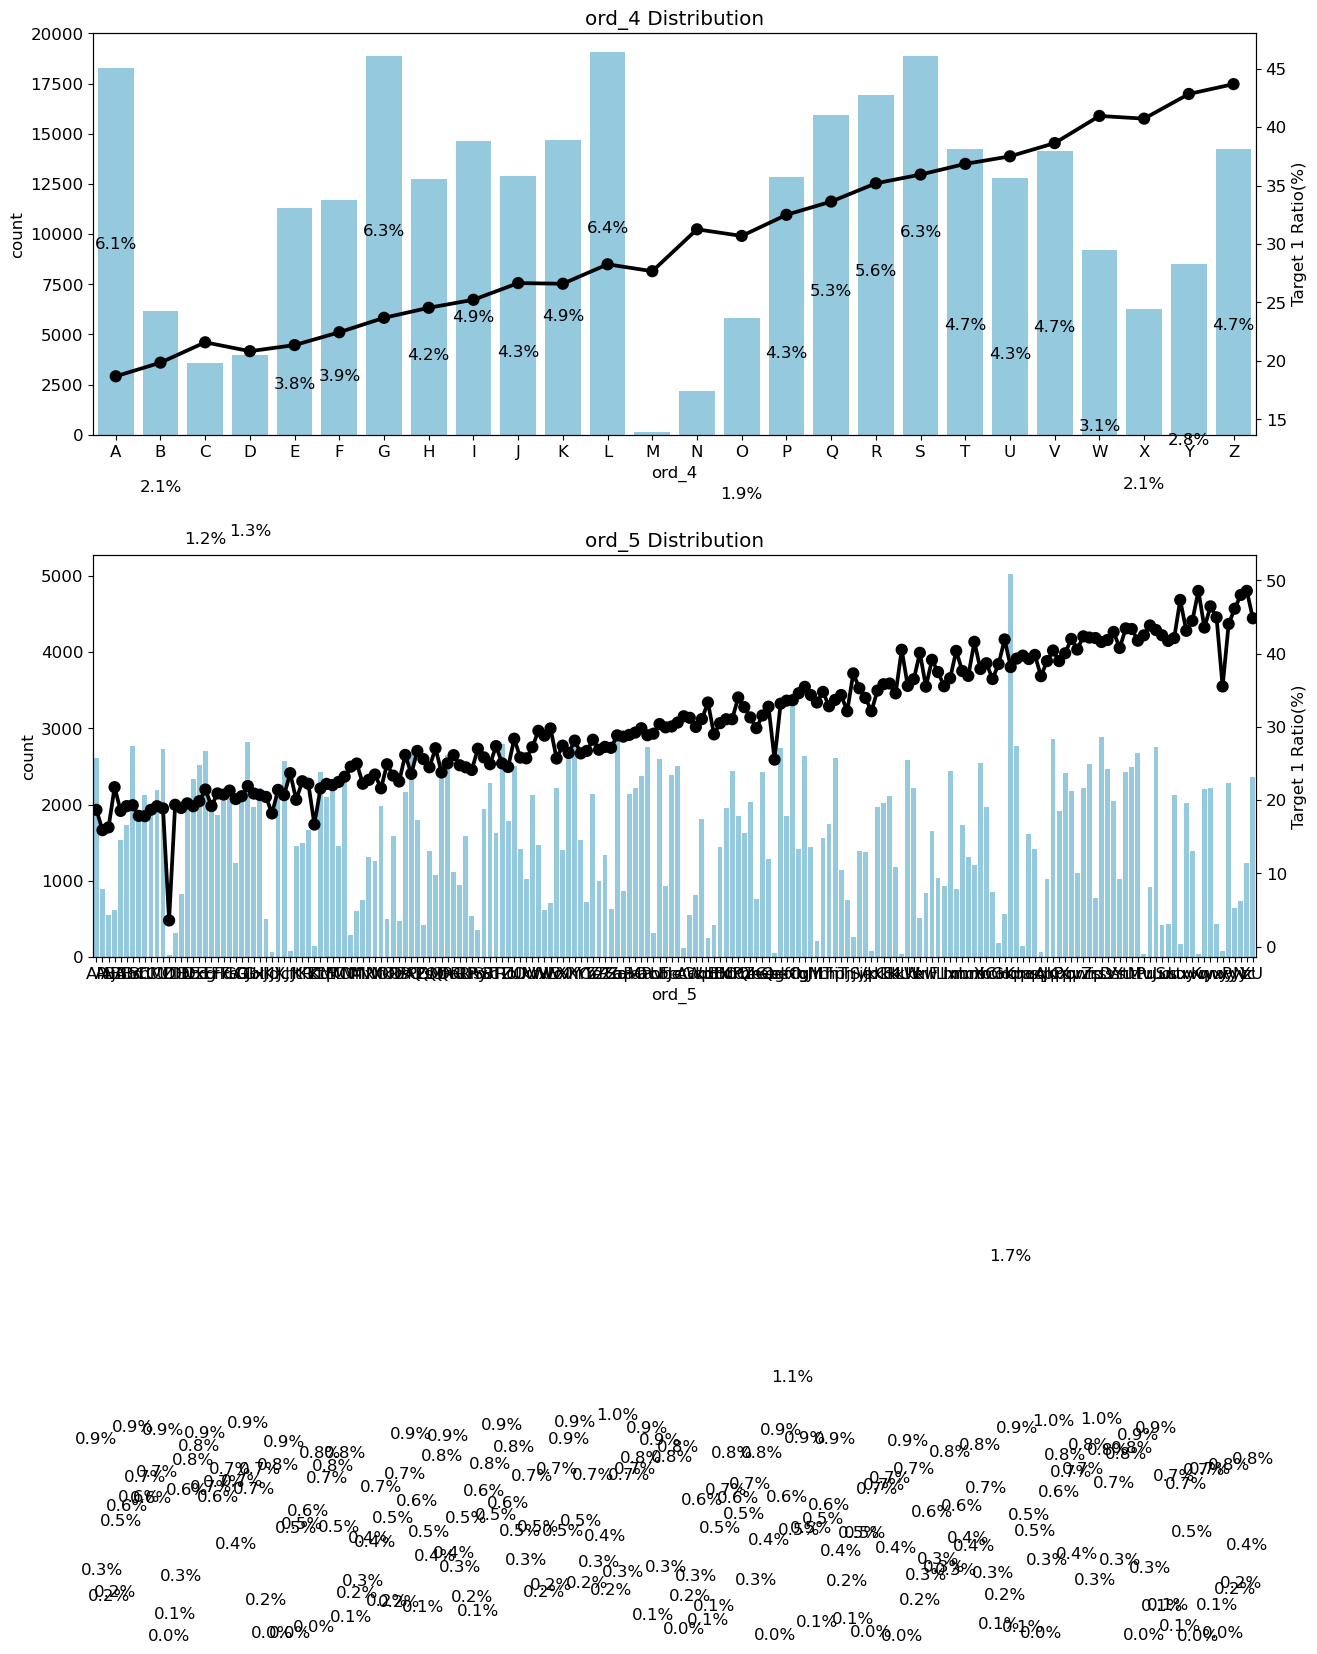

In [39]:
plot_cat_dist_with_true_ratio(train_data, ['ord_4', 'ord_5'], num_rows=2, num_cols=1, size=(15, 12))

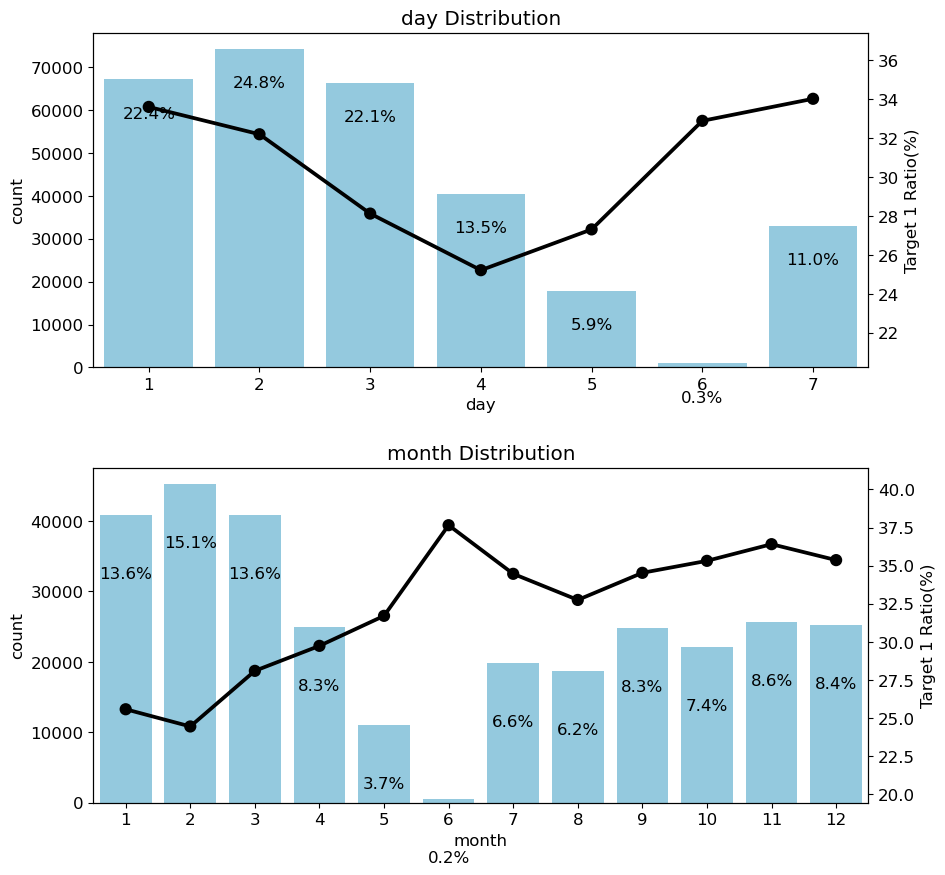

In [40]:
date_features = ['day', 'month']
plot_cat_dist_with_true_ratio(train_data, date_features,  num_rows=2, num_cols=1, size=(10, 10))

In [41]:
train_data = pd.read_csv(data_path+'train.csv', index_col = 'id')
test_data = pd.read_csv(data_path+'test.csv',  index_col = 'id')

In [44]:
all_data = pd.concat([train_data, test_data])
all_data = all_data.drop('target', axis=1)

In [45]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
all_data_encoded = encoder.fit_transform(all_data)

In [46]:
num_train= len(train_data)

In [48]:
X_train= all_data_encoded[:num_train]
X_test = all_data_encoded[num_train :]
y= train_data['target']

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.1, stratify=y)

In [50]:
#Logistric Regression
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter =1000, random_state=42)
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [52]:
#Probability that target value =1
y_valid_preds= logistic_model.predict_proba(X_valid)[:,1]

In [57]:
from sklearn.metrics import roc_auc_score

roc_auc=roc_auc_score(y_valid, y_valid_preds)
print(f'validate data ROC AUC: {roc_auc:.4f}')

validate data ROC AUC: 0.7934


In [62]:
# improve encoding
train_data = pd.read_csv(data_path+'train.csv', index_col = 'id')
test_data = pd.read_csv(data_path+'test.csv',  index_col = 'id')
all_data = pd.concat([train_data, test_data])
all_data = all_data.drop('target', axis=1)

In [63]:
#binary features:
all_data['bin_3'] = all_data['bin_3'].map({'F':0, 'T':1})
all_data['bin_4'] = all_data['bin_4'].map({'N':0, 'Y':1})

#Ordinal features:
ord1dict = {'Novice':0, 'Contributor':1, 'Expert':2, 'Master':3, 'Grandmaster':4}
ord2dict = {'Freezing':0, 'Cold':1, 'Warm':2, 'Hot':3, 'Boiling Hot':4, 'Lava Hot':5}
all_data['ord_1'] = all_data['ord_1'].map(ord1dict)
all_data['ord_2'] = all_data['ord_2'].map(ord2dict)

from sklearn.preprocessing import OrdinalEncoder
ord_345 = ['ord_3', 'ord_4', 'ord_5']
ord_encoder = OrdinalEncoder()
all_data[ord_345] = ord_encoder.fit_transform(all_data[ord_345])

#Categorial features
nom_features = ['nom_' + str(i) for i in range(10)] 
from sklearn.preprocessing import OneHotEncoder
onehot_encoder = OneHotEncoder()
encoded_nom_matrix = onehot_encoder.fit_transform(all_data[nom_features])
encoded_nom_matrix
all_data = all_data.drop(nom_features, axis=1) 

In [64]:
#date features:
date_features = ['day', 'month'] 
encoded_date_matrix = onehot_encoder.fit_transform(all_data[date_features])
all_data = all_data.drop(date_features, axis=1) 
encoded_date_matrix

<500000x19 sparse matrix of type '<class 'numpy.float64'>'
	with 1000000 stored elements in Compressed Sparse Row format>

In [65]:
#feature scaling for ordinal data
from sklearn.preprocessing import MinMaxScaler
ord_features = ['ord_' + str(i) for i in range(6)] 
all_data[ord_features] = MinMaxScaler().fit_transform(all_data[ord_features])

In [66]:
# combining data above by using sparse matrix
from scipy import sparse
all_data_sprs = sparse.hstack([sparse.csr_matrix(all_data), encoded_nom_matrix,encoded_date_matrix],format='csr')

In [68]:
num_train = len(train_data) 
X_train = all_data_sprs[:num_train]
X_test = all_data_sprs[num_train:] 
y = train_data['target']

In [69]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y, test_size = 0.1, stratify=y)

In [70]:
# optimizing hyper-parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression()
lr_params = {'C':[0.1, 0.125, 0.2], 'max_iter':[800, 900, 1000], 'solver':['liblinear']}

gridsearch_logistic_model = GridSearchCV(estimator=logistic_model, param_grid=lr_params, scoring='roc_auc', cv=5)
gridsearch_logistic_model.fit(X_train, y_train)
print('Optimized parameters:', gridsearch_logistic_model.best_params_)


Optimized parameters: {'C': 0.125, 'max_iter': 800, 'random_state': 42, 'solver': 'liblinear'}


In [71]:
y_valid_preds = gridsearch_logistic_model.predict_proba(X_valid)[:, 1]
roc_auc=roc_auc_score(y_valid, y_valid_preds)
print(f'validate data ROC AUC: {roc_auc:.4f}')

validate data ROC AUC: 0.8049
